# Image Classification for Malaria Cells

In [1]:
#Importing Necessary Libraries.
from PIL import Image
import numpy as np
import pandas as pd
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout, Input, LSTM
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

C:\Users\jonat\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Import Data

In [2]:
#initiate empty lists for images
data=[]
labels=[]

#loop through folder with images and append to data, append 0 to labels for infected
Infected=os.listdir("C:\\Users\jonat\Documents\Python Scripts\Coursera\Advanced Data Science\Applied AI\cell_images\Infected/")
for a in Infected:
    try:
        image=cv2.imread("C:\\Users\jonat\Documents\Python Scripts\Coursera\Advanced Data Science\Applied AI\cell_images\Infected/" +a)
        data.append(image)
        labels.append(0)
    except AttributeError:
        print("")
        
#loop through folder with images and append to data, append 1 to labels for uninfected
Uninfected=os.listdir("C:\\Users\jonat\Documents\Python Scripts\Coursera\Advanced Data Science\Applied AI\cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("C:\\Users\jonat\Documents\Python Scripts\Coursera\Advanced Data Science\Applied AI\cell_images/Uninfected/"+b)
        data.append(image)
        labels.append(1)
    except AttributeError:
        print("")
        

In [21]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

### Filter out None type objects
- only 2 entries lost

In [3]:
data  =[x for x in data if x is not None]

In [4]:
remove = [i for i in range(len(data)) if data[i] is None]
labels = [labels[i] for i in range(len(labels)) if i not in remove ]

## Scale images to equal size

In [5]:
data_scaled = []
for image in data:
    try:
        image_from_array = Image.fromarray(image, 'RGB') 
        size_image = image_from_array.resize((50, 50)) # resize all images to 50,50
        data_scaled.append(np.array(size_image)) # append to data_scaled list
    except AttributeError:
        print("")

In [6]:
#Convert lists to arrays
data_scaled = np.array(data_scaled)
labels = np.array(labels)

In [ ]:
#save data so image import steps do not need to be re-run
np.save('data', data)
np.save('data_scaled', data_scaled)
np.save('labels', labels)

### Import saved data (so don't need to re-run image import)

In [3]:
data = np.load("data.npy")
data_scaled = np.load("data_scaled.npy")
labels=np.load("labels.npy")

### Shuffle data

- Currently data is just Uninfected images appended to Infected images in order

In [7]:
#take current index
shuffle_order =np.arange(data_scaled.shape[0])

#shuffle index
np.random.shuffle(shuffle_order)

#apply shuffled indexing to arrays
data_scaled=data_scaled[shuffle_order]
labels=labels[shuffle_order]

### Create Test and Control groups for training

In [8]:
test_size =0.2

x_train = data_scaled[:int(len(data_scaled)*(1-test_size))]
x_test = data_scaled[int(len(data_scaled)*(1-test_size)):]

y_train = labels[:int(len(labels)*(1-test_size))]
y_test = labels[int(len(labels)*(1-test_size)):]

train_len = len(x_train)
test_len = len(x_test)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [9]:
#also want to keep a track of which index each 
shuffle_order_test = shuffle_order[int(len(shuffle_order)*(1-test_size)):]

In [10]:
print(y_train.shape, y_test.shape)
print(x_train.shape, x_test.shape)



(22046,) (5512,)
(22046, 50, 50, 3) (5512, 50, 50, 3)


## Training Neural Network

In [11]:
model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(50,50,3)))

model.add(Flatten())

model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()
model.fit(x=x_train, y=y_train, epochs=10, batch_size=50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50, 50, 10)        40        
_________________________________________________________________
flatten_1 (Flatten)          (None, 25000)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25001     
Total params: 25,041
Trainable params: 25,041
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22046/22046 [==============================] - 13s 583us/step - loss: 8.0606 - acc: 0.4997
Epoch 2/10
22046/22046 [==============================] - 10s 432us/step - loss: 8.0576 - acc: 0.5001
Epoch 3/10
22046/22046 [==============================] - 24s 1ms/

## Optimising Neural Network

In [12]:
model.add(Dense(10, activation='relu', input_shape=(50,50,3)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=16, kernel_size=2,padding="same",activation="relu" ))

model.add(Flatten())
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
model.fit(x=x_train, y=y_train, epochs=10, batch_size=50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50, 50, 10)        40        
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 16)        656       
_________________________________________________________________
flatten_2 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                400010    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 400,717
Trainable params: 400,717
Non-trainable params: 0
_________________________________________________________________
Epoc

In [13]:
pred = np.concatenate(model.predict_classes(x_test))

In [14]:
score = pd.DataFrame({'predictions':pred, 'actuals':y_test})

## Confusion Matrix

In [15]:

cm = confusion_matrix(y_pred=pred, y_true=y_test)

In [16]:
cm_pct = np.array([cm[0]/np.sum(cm[0]),cm[1]/np.sum(cm[1])])*100

### Plot confusion matrix

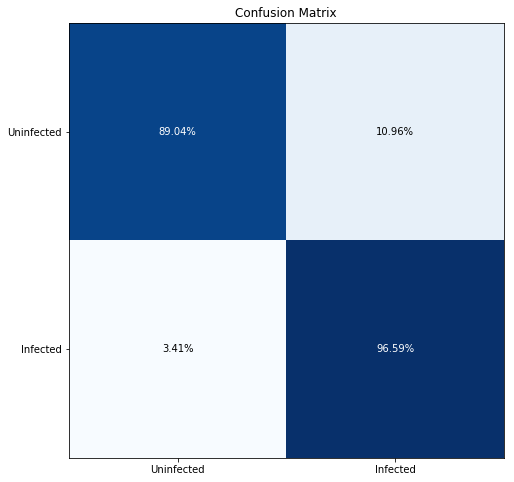

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(cm_pct, interpolation='nearest', cmap='Blues')


ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=['Uninfected','Infected'], yticklabels=['Uninfected','Infected']
      ,title='Confusion Matrix');

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm_pct[i, j], '.2f')+'%',
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2 else "black")

## Output images into separate folders 

In [22]:
infected = []
uninfected = []

for i in range(len(x_test)):
    if pred[i] == 0:
        infected.append(data[shuffle_order_test[i]])
    else:
        uninfected.append(data[shuffle_order_test[i]])

In [24]:
path_infected = 'C:\\Users/jonat/Documents/Python Scripts/Coursera/Advanced Data Science/Applied AI/output/infected'
path_uninfected = 'C:\\Users/jonat/Documents/Python Scripts/Coursera/Advanced Data Science/Applied AI/output/uninfected'

for i in range(len(infected)):
    cv2.imwrite(os.path.join(path_infected , str(i)+'_infected.jpg'), infected[i])

for i in range(len(uninfected)):
    cv2.imwrite(os.path.join(path_uninfected , str(i)+'_uninfected.jpg'), uninfected[i])